In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from model_selection import train_test_split

In [79]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X = X[y!=2][:,:2]
y = y[y!=2]

In [6]:
from logistic_regression import LogisticRegressor

lr = LogisticRegressor()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [9]:
lr.fit(X_train,y_train)

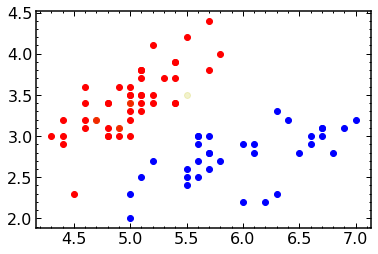

In [10]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='r')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='b')
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c='y',alpha=0.2)

In [24]:
lr.score(X_test,y_test)

0.95

## 画出决策边界

In [99]:
def plot_boundry(algo,axis):
    XX,YY = np.meshgrid(np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
                       np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)))
    plot_X = np.c_[XX.ravel(),YY.ravel()]
    y = algo.predict(plot_X)
    y = y.reshape(XX.shape)
    plt.contourf(XX,YY,y,cmap='viridis',alpha=0.8)


def scatter_2d(X,y):
    plt.scatter(X[y==0,0],X[y==0,1],c='r')
    plt.scatter(X[y==1,0],X[y==1,1],c='b')
    
def plot_boundry_poly(algo,poly_algo,axis):
    XX,YY = np.meshgrid(np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
                       np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)))
    plot_X = np.c_[XX.ravel(),YY.ravel()]
    poly_algo.fit(plot_X)
    plot_X = poly_algo.transform(plot_X)
    y = algo.predict(plot_X)
    y = y.reshape(XX.shape)
    plt.contourf(XX,YY,y,cmap='viridis',alpha=0.8)



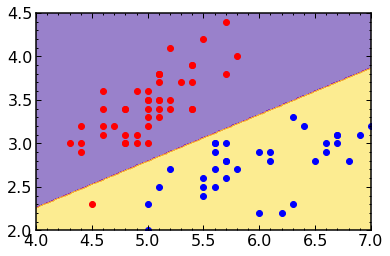

In [50]:
plot_boundry(lr,[4,7,2,4.5])
scatter_2d(X_train,y_train)

In [35]:
from kn_classifier import KNclassifier

In [45]:
knn = KNclassifier(10,'uniform')
knn.fit(X_train,y_train)

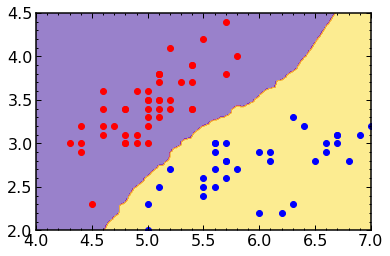

In [51]:
plot_boundry(knn,[4,7,2,4.5])
scatter_2d(X_train,y_train)

In [53]:
knn.score(X_test,y_test)

1.0

## 多项式逻辑回归

In [87]:
np.random.seed()
X = np.random.normal(0,1,size=(200,2))
y = np.array((X[:,0]**2 + X[:,1]**2)<1,dtype='int')

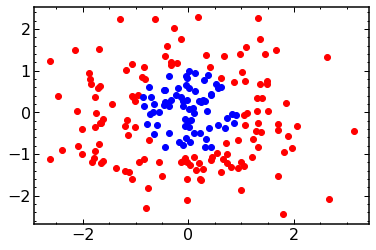

In [88]:
scatter_2d(X,y)

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from logistic_regression import LogisticRegressor
poly = PolynomialFeatures(2)
lr = LogisticRegressor()

In [90]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [91]:
X_poly = poly.transform(X)

In [92]:
lr.fit(X_poly,y)

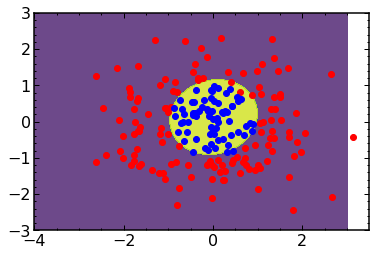

In [100]:
plot_boundry_poly(lr,poly,[-4,3,-3,3])
scatter_2d(X,y)